# Problem Statement:

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

## Data Description

- The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- 
- The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
- The ‘Time’ and ‘Amount’ features are not transformed data.The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- There is no missing value in the dataset.

 
.

## Important terms
- True Positive: The fraud cases that the model predicted as ‘fraud.’
- False Positive: The non-fraud cases that the model predicted as ‘fraud.’
- True Negative: The non-fraud cases that the model predicted as ‘non-fraud.’
- False Negative: The fraud cases that the model predicted as ‘non-fraud.’
- Threshold Cutoff Probability: Probability at which the true positive ratio and true negatives ratio are both highest. It can be noted that this probability is minimal, which is reasonable as the probability of frauds is low.
- Accuracy: The measure of correct predictions made by the model – that is, the ratio of fraud transactions classified as fraud and non-fraud classified as non-fraud to the total transactions in the test data.
- Sensitivity: Sensitivity, or True Positive Rate, or Recall, is the ratio of correctly identified fraud cases to total fraud cases.
- Specificity: Specificity, or True Negative Rate, is the ratio of correctly identified non-fraud cases to total non-fraud cases.
- Precision: Precision is the ratio of correctly predicted fraud cases to total predicted fraud cases.

In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
c=pd.read_csv('F:\\ML & Data Visualization\\credit.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(c.shape[0], c.shape[1]))

This data frame has 284807 rows and 31 columns.


In [5]:
c.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
#numerical summary -> only non-anonymized columns of interest
#pd.set_option('precision', 3)
c.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


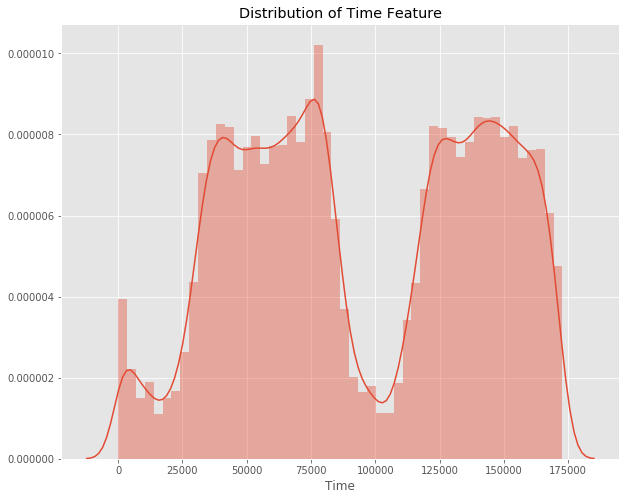

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(c.Time)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


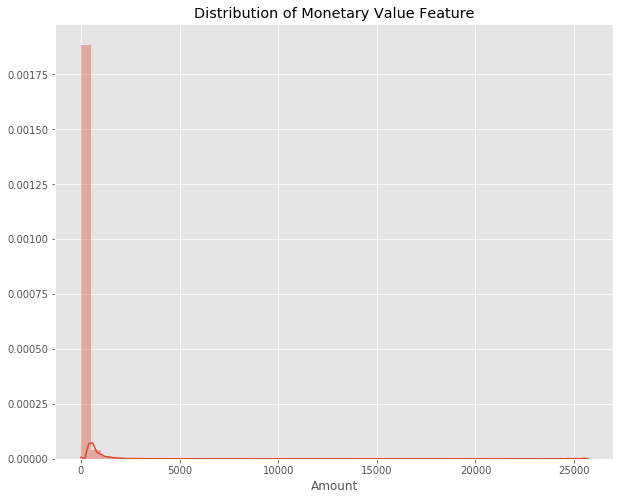

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(c.Amount)

# Insight
Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [10]:
#fraud vs. normal transactions 
counts = c.Class.value_counts()
normal = counts[0]
print(normal)
fraudulent = counts[1]
print(fraudulent)
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

284315
492
0    284315
1       492
Name: Class, dtype: int64
There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


NameError: name 'prints' is not defined

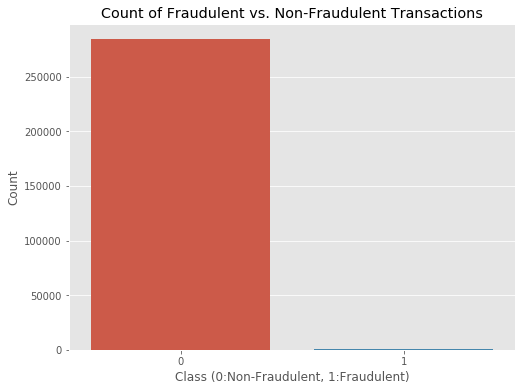

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')
print(counts.index)

In [11]:
corr = c.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

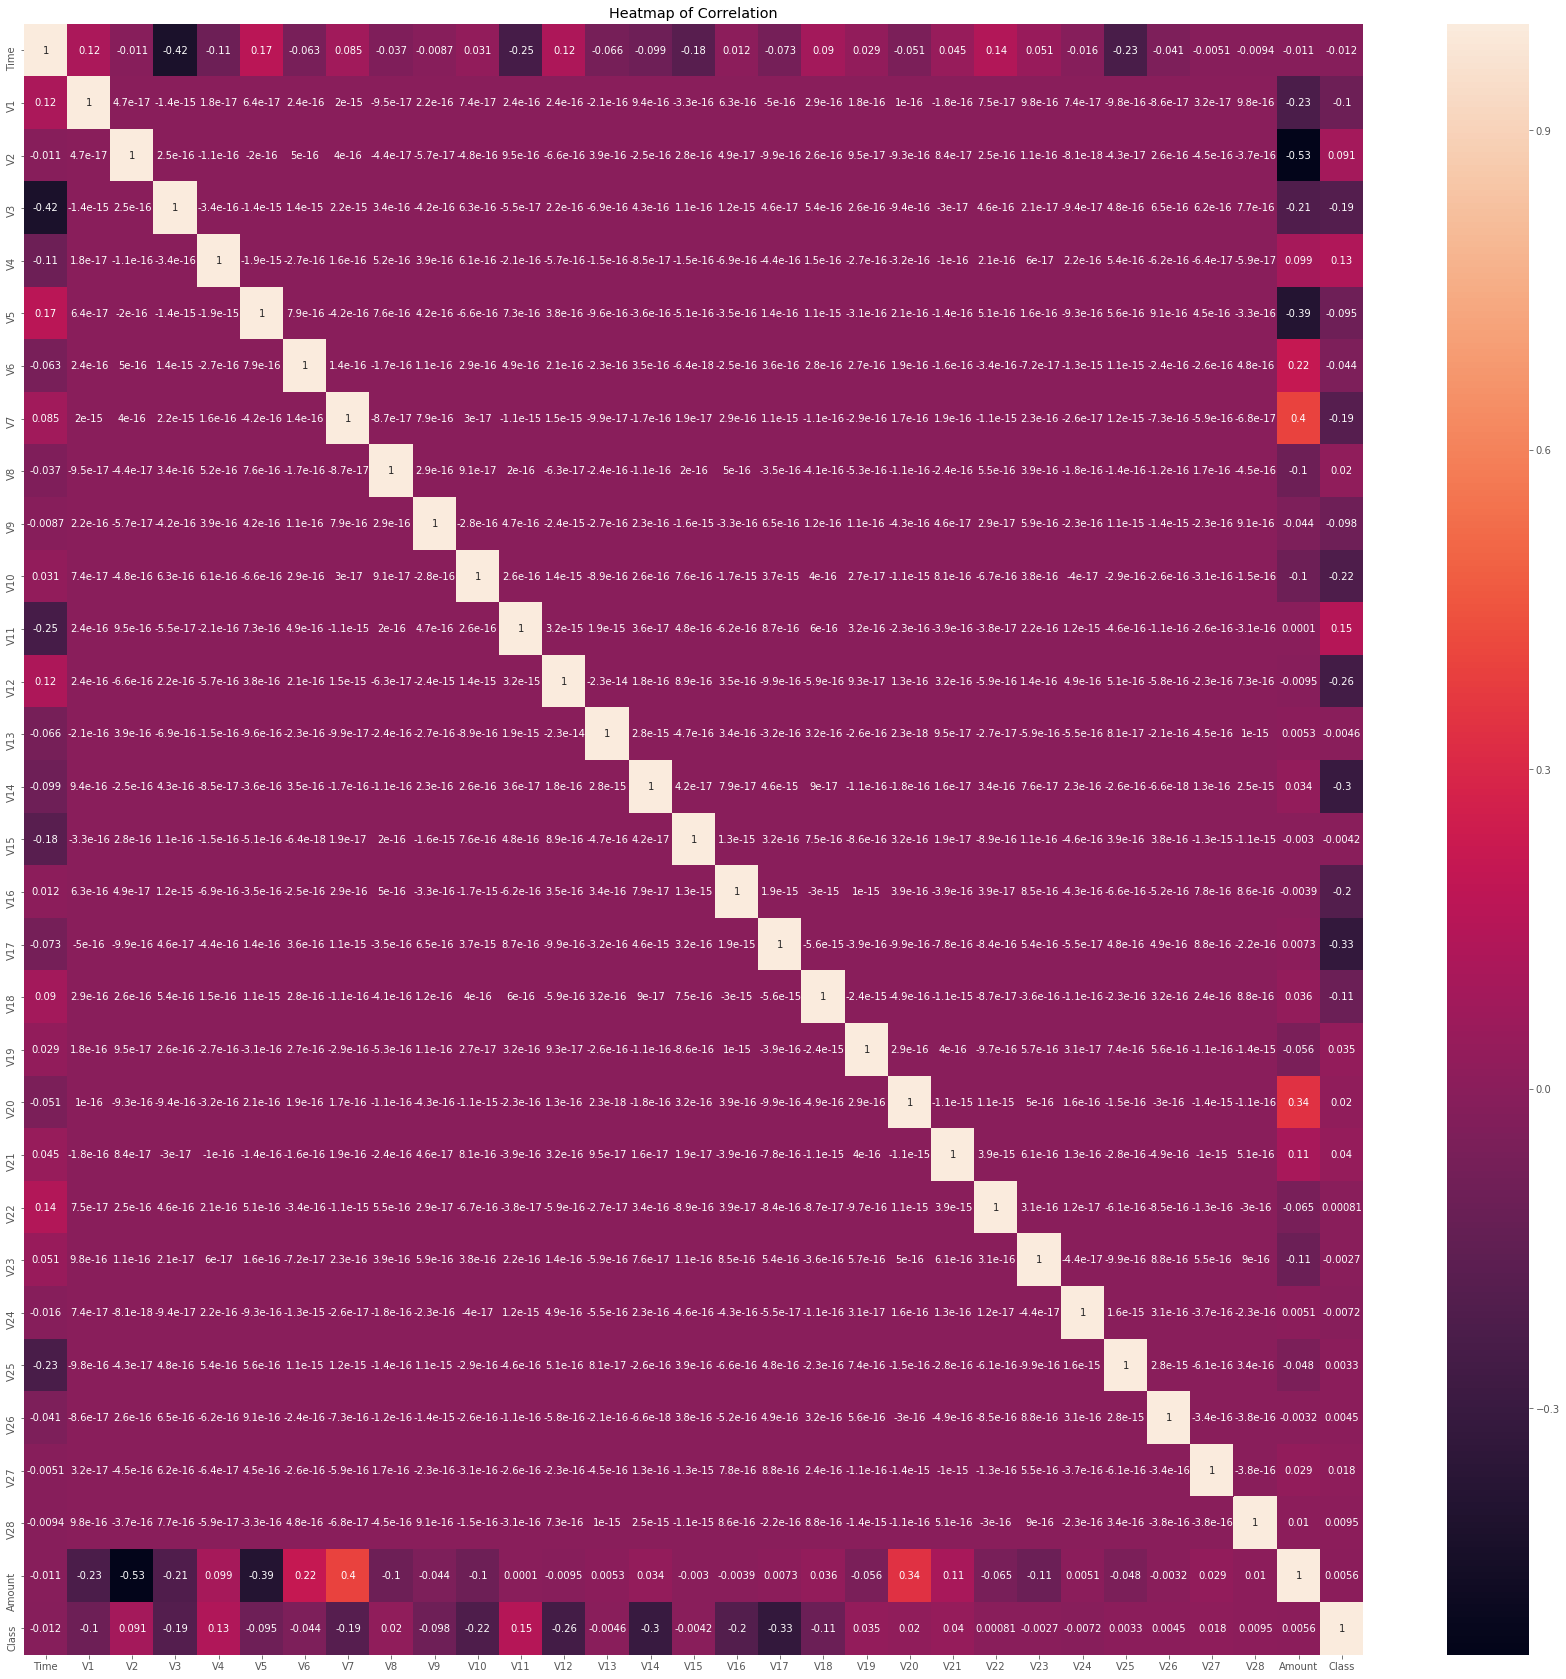

In [13]:
#heatmap
corr = c.corr()
plt.figure(figsize=(30,30))
heat = sns.heatmap(data=corr,annot=True)
plt.title('Heatmap of Correlation')

In [13]:
#skewness
skew_ = c.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [31]:
## Scaling Amount and Time

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(c[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [35]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(c[['Amount']])
#for item in scaled_amount.tolist():
    #flat_list2=item.tolist()
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)
print(scaled_amount)

0         0.245
1        -0.342
2         1.161
3         0.141
4        -0.073
5        -0.339
6        -0.333
7        -0.190
8         0.019
9        -0.339
10       -0.322
11       -0.313
12        0.133
13       -0.243
14       -0.118
15       -0.289
16       -0.301
17       -0.350
18       -0.166
19       -0.333
20        0.573
21       -0.217
22       -0.344
23       -0.262
24       -0.350
25       -0.248
26       -0.186
27       -0.289
28       -0.221
29       -0.301
          ...  
284777   -0.349
284778   -0.033
284779   -0.253
284780   -0.233
284781   -0.301
284782   -0.302
284783   -0.307
284784   -0.193
284785   -0.346
284786   -0.317
284787   -0.313
284788   -0.337
284789   -0.111
284790   -0.314
284791   -0.272
284792   -0.337
284793   -0.333
284794   -0.350
284795   -0.314
284796   -0.113
284797   -0.331
284798   -0.257
284799   -0.033
284800   -0.343
284801   -0.342
284802   -0.350
284803   -0.254
284804   -0.082
284805   -0.313
284806    0.514
Length: 284807, dtype: f

In [36]:
#concatenating newly created columns w original df
c = pd.concat([c, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
c.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
51358,44910.0,-0.426,0.970,1.539,-0.019,-0.165,-0.904,0.680,-0.025,-0.280,...,0.006,0.344,-0.218,0.074,0.258,0.120,10.58,0,-0.311,-1.051
25346,33568.0,-1.698,0.499,2.468,1.218,-0.759,-0.091,-0.050,0.196,0.311,...,-0.121,0.399,0.391,-0.021,0.613,0.435,100.00,0,0.047,-1.290
157427,109866.0,2.070,-0.097,-1.497,0.189,0.386,-0.351,-0.152,-0.106,2.058,...,-0.019,0.197,0.299,-0.479,-0.038,-0.071,1.00,0,-0.349,0.317
9550,14299.0,-1.961,-1.021,1.602,-1.125,1.918,-1.690,-0.680,-0.039,1.688,...,-0.202,-0.482,-0.510,0.435,0.010,0.120,11.99,0,-0.305,-1.695
127761,78457.0,-1.923,-1.274,1.913,1.749,1.904,-2.485,-1.037,0.023,-0.757,...,0.464,0.902,-0.335,0.290,0.023,0.184,4.49,0,-0.335,-0.344


In [17]:
#dropping old amount and time columns
c.drop(['Amount', 'Time'], axis=1, inplace=True)

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(c)) < 0.9
train = c[mask]
test = c[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256486, 31)
Test Shape: (28321, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [20]:
# Creating a subsample data set with balanced class distributions

#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 445 fraudulent transactions in the train data.


In [21]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
195934,1.687,-0.552,-0.405,1.451,-0.647,-0.437,-0.213,-0.036,0.951,0.114,...,-0.621,0.276,-0.177,-0.465,-0.985,0.026,-0.004,0,0.214,0.972
88331,1.049,0.436,1.092,2.391,-0.210,0.346,-0.233,0.185,-0.942,0.756,...,0.372,0.026,0.234,0.276,-0.019,0.026,0.022,0,-0.296,-0.595
25564,-0.954,-0.868,2.232,-1.704,-0.221,-0.489,-0.231,-0.342,-0.221,0.608,...,1.185,-0.465,0.115,0.005,-0.246,-0.416,-0.452,0,-0.073,-1.260
236858,1.922,-0.357,-0.941,0.442,-0.357,-0.107,-0.787,0.243,1.055,-0.292,...,0.696,0.138,0.624,-0.297,0.596,-0.025,-0.025,0,-0.273,1.389
57580,-1.768,2.197,-0.713,1.232,0.093,-0.402,-0.328,1.114,-1.201,-1.263,...,0.256,-0.227,-0.556,-0.089,-0.233,-0.557,-0.059,0,-0.349,-0.923


In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

890

In [24]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.726,0.855,0.650,0.357,0.024,-1.426,0.483,0.197,-0.548,-0.686,...,1.048,0.051,0.730,-0.744,-0.589,0.114,0.127,0,-0.273,-0.536
1,-1.309,1.786,-1.371,1.214,-0.337,-1.390,-1.709,0.668,-1.700,-3.844,...,-0.022,-0.300,-0.226,0.364,-0.475,0.571,0.293,1,-0.349,-1.027
2,-0.613,0.180,0.802,-0.419,0.488,0.554,0.088,0.114,0.948,-0.638,...,0.237,-0.183,-0.052,-0.919,-0.504,-0.082,-0.010,0,-0.054,0.806
3,-0.639,-0.086,1.265,1.401,-0.261,1.010,1.302,-0.135,-0.432,-0.091,...,0.760,0.353,-0.779,-0.071,-0.033,-0.062,-0.063,1,0.807,-0.658
4,-2.007,3.677,-5.464,7.232,-1.628,-0.997,-4.300,2.269,-3.651,-4.401,...,-0.064,0.168,-0.450,0.024,0.537,0.486,-0.042,1,-0.349,1.024
5,0.007,0.719,0.267,-0.555,0.524,-0.547,0.622,0.045,1.372,-0.548,...,-0.883,0.068,-0.530,-0.595,0.116,0.203,0.072,0,-0.339,-0.089
6,-2.787,-0.071,-1.505,3.362,-3.357,0.566,0.304,0.967,-2.246,-3.651,...,-0.246,1.752,0.220,0.156,-0.266,0.221,0.256,1,2.569,-1.402
7,-1.201,4.865,-8.329,7.652,-0.167,-2.768,-3.176,1.623,-4.367,-5.533,...,-0.557,0.192,-0.699,0.025,0.515,0.378,-0.053,1,-0.350,1.288
8,-1.768,2.197,-0.713,1.232,0.093,-0.402,-0.328,1.114,-1.201,-1.263,...,0.256,-0.227,-0.556,-0.089,-0.233,-0.557,-0.059,0,-0.349,-0.923
9,-2.809,2.880,-0.725,-0.212,-0.714,-0.218,-1.195,-1.183,-0.226,-0.154,...,-1.650,0.392,-0.550,0.181,0.132,-0.053,-0.006,0,-0.345,-0.526


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

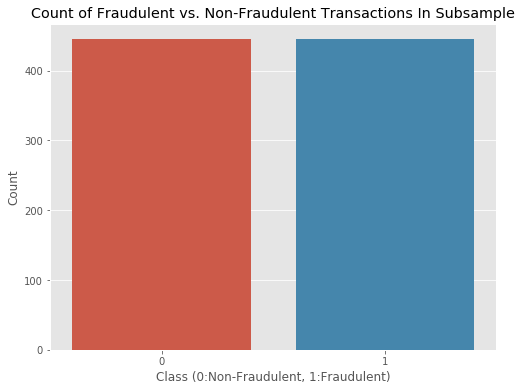

In [25]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [26]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.439
V2,0.498
V3,-0.566
V4,0.714
V5,-0.391
V6,-0.378
V7,-0.485
V8,0.051
V9,-0.544
V10,-0.626


In [27]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.566
V9,-0.544
V10,-0.626
V12,-0.681
V14,-0.746
V16,-0.597
V17,-0.559


In [28]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.714
V11,0.689
Class,1.000


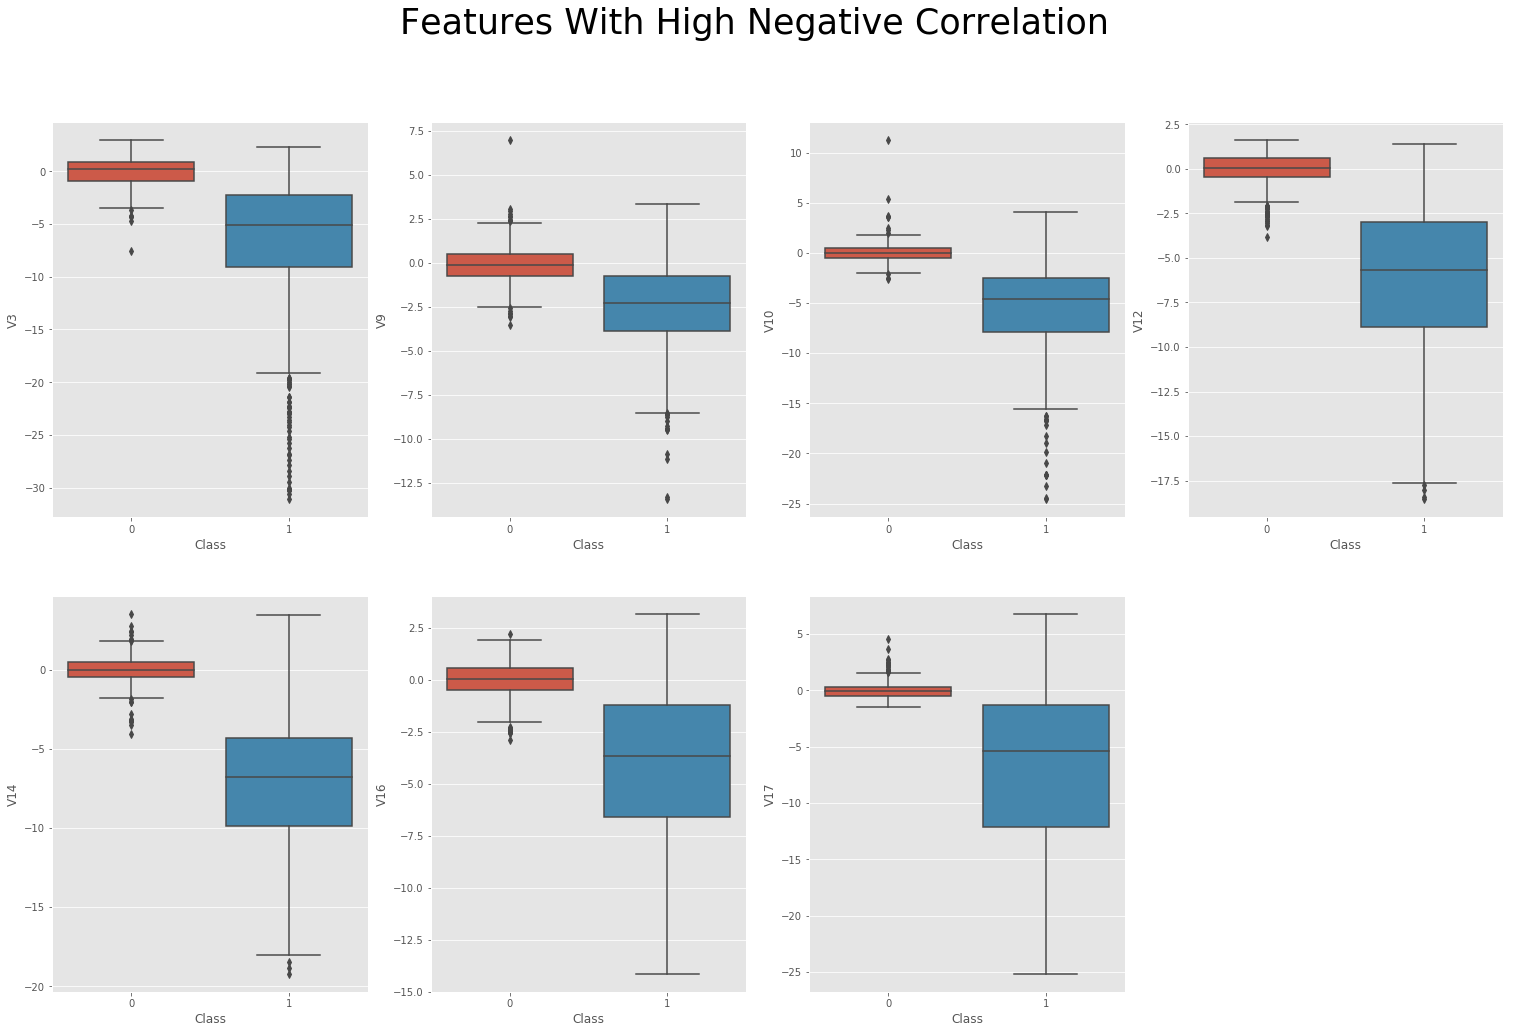

In [29]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

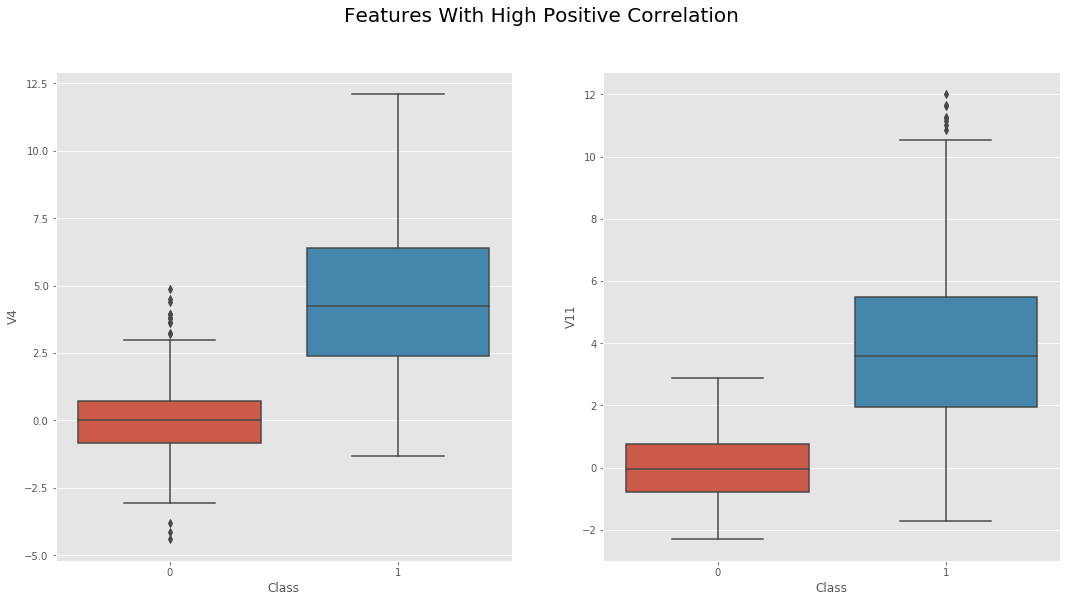

In [30]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [33]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

c2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]
len_after = len(c2)
len_before = len(subsample)
len_difference = len(subsample) - len(c2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 890 transactions by 254 transactions to 636 transactions.


In [34]:
## Dimensionality Reduction

from sklearn.manifold import TSNE

X = c2.drop('Class', axis=1)
y = c2['Class']
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

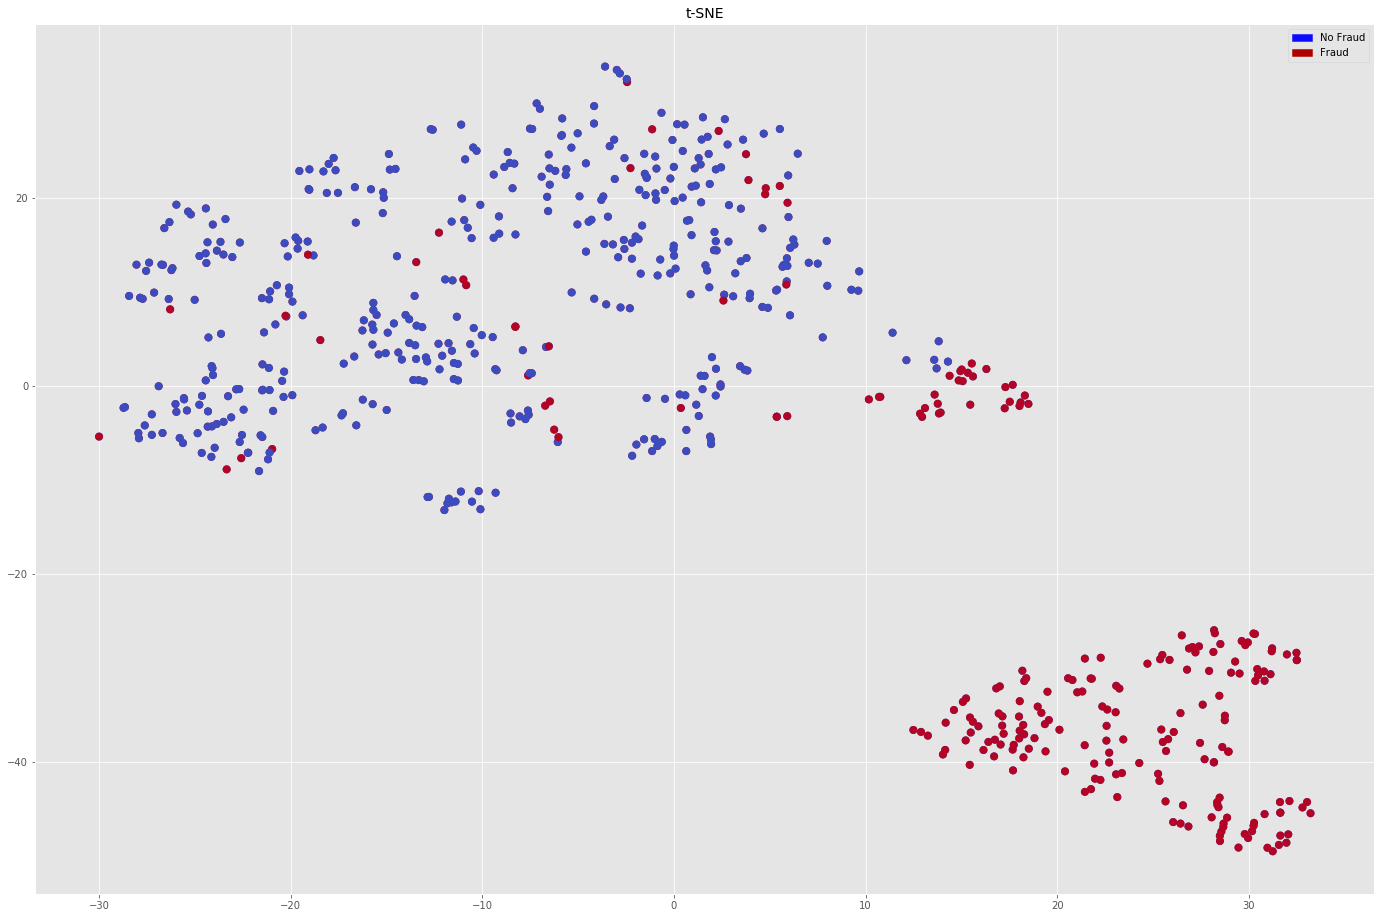

In [35]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [36]:
## Classification Algorithms


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (508, 30) (128, 30) 

Y_shapes:
 Y_train: Y_validation:
 (508,) (128,)


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.961843 (0.028858)
LDA: 0.954895 (0.030288)
KNN: 0.952829 (0.031013)
CART: 0.887152 (0.027587)
SVM: 0.958068 (0.030751)
RF: 0.945845 (0.028972)


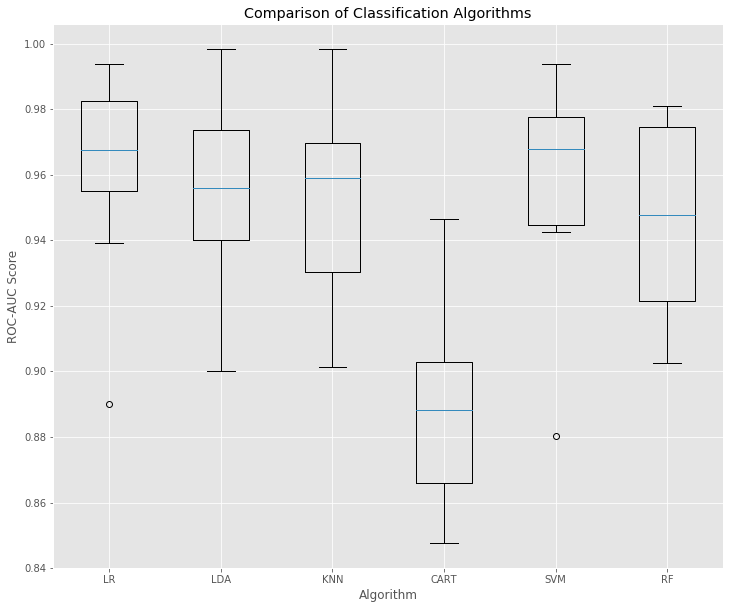

In [42]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()